In [70]:


import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [71]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

## Q1 – Population Growth Rate

In [25]:
q1_sql= """

SELECT 
    year,
    pop,
    LAG(pop) OVER (ORDER BY year) AS prev_pop,
    ROUND(
        (pop - LAG(pop) OVER (ORDER BY year))::numeric 
        / NULLIF(LAG(pop) OVER (ORDER BY year), 0) * 100, 
        2
    ) AS growth_rate_percent
FROM population
WHERE fips = '18'   
ORDER BY year ASC;



"""


In [26]:
import pandas as pd

q1_df = pd.read_sql(q1_sql, con=conn)
q1_df.head() 

/tmp/ipykernel_6676/2468950264.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q1_df = pd.read_sql(q1_sql, con=conn)


,year,pop,prev_pop,growth_rate_percent
0,2005,6093372,NaN,NaN
1,2006,6313520,6093372.0,3.61
2,2007,6345289,6313520.0,0.50
3,2008,6376792,6345289.0,0.50
4,2009,6423113,6376792.0,0.73


In [77]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install --only-binary=:all: "tiktoken>=0.7.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.1 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install "jupyter-ai-magics[all]" -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
safety-schemas 0.0.14 requires pydantic<2.10.0,>=2.6.0, but you have pydantic 2.12.0 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [80]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [81]:
%load_ext jupyter_ai_magics

In [36]:
%%ai gpt4
What is included in the {q1_df}

UsageError: Cell magic `%%ai` not found.


In [37]:
%%ai gpt4 -f code 
use the data in {q1_df}, creates a line chart with the growth rate.
    Chart must include Indiana in the title

UsageError: Cell magic `%%ai` not found.


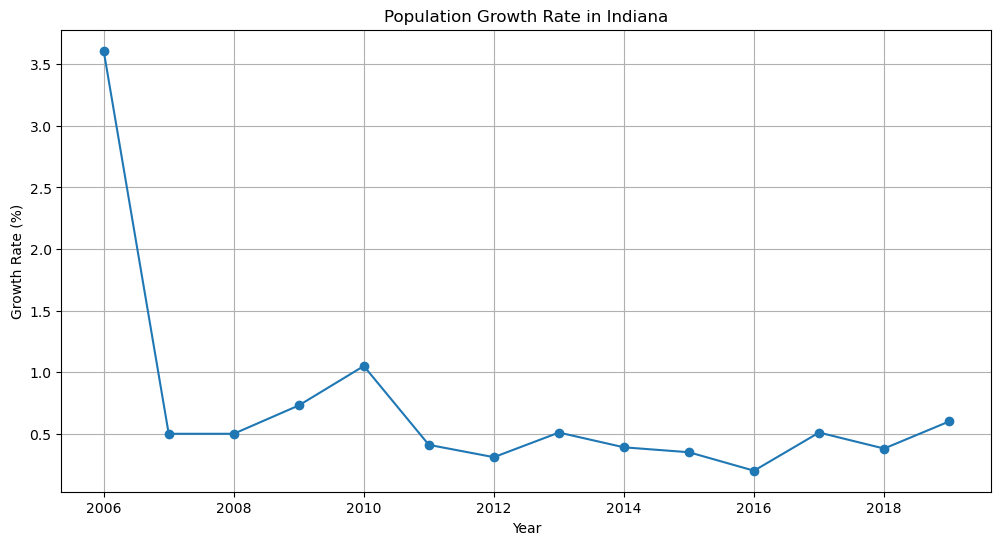

In [38]:
import matplotlib.pyplot as plt

data = {
    "year": [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    "growth_rate_percent": [None, 3.61, 0.5, 0.5, 0.73, 1.05, 0.41, 0.31, 0.51, 0.39, 0.35, 0.20, 0.51, 0.38, 0.60]
}

plt.figure(figsize=(12,6))
plt.plot(data["year"], data["growth_rate_percent"], marker='o')
plt.title('Population Growth Rate in Indiana')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

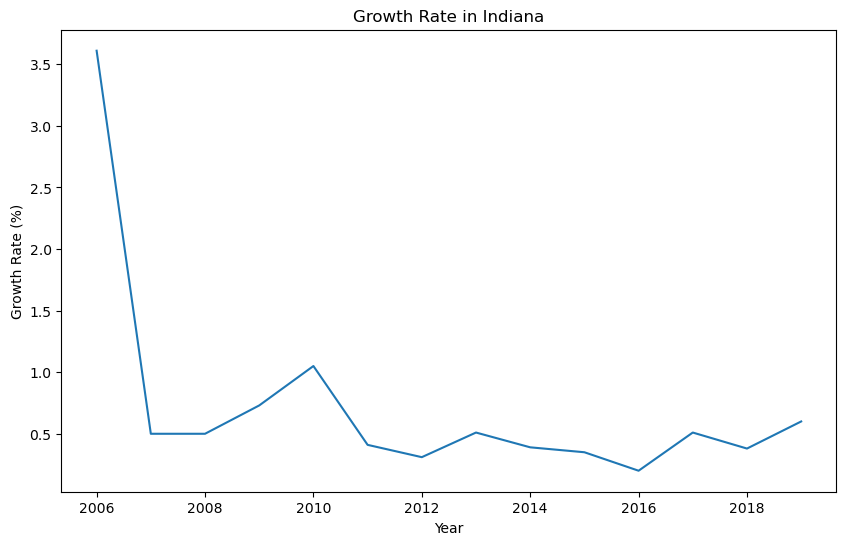

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(q1_df['year'], q1_df['growth_rate_percent'])
plt.title('Growth Rate in Indiana') 
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.show()

Population growth percentage in Indiana decreased drastically during the years of 2006-2008. From those years on, there was fluctuation in percentage from 2010 to 2018, but it never speaked higher then 1% during those 10 years.

## Q2 – Income and Population Relationship

In [72]:
q2_sql = """

SELECT

    n.name AS state,

    i.year,

    p.pop AS population,

    i.income

FROM income i

JOIN population p

    ON i.fips = p.fips

   AND i.year = p.year

JOIN name n

    ON i.fips = n.fips

WHERE n.name = 'Indiana'

  AND n.fips = '18'

ORDER BY i.year ASC;

 

"""

In [73]:
import pandas as pd

 

q2_df = pd.read_sql(q2_sql, con=conn)

q2_df.head() #show the top 5 rows

 



/tmp/ipykernel_6676/1208948476.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q2_df = pd.read_sql(q2_sql, con=conn)


,state,year,population,income
0,Indiana,2005,6093372,43993
1,Indiana,2006,6313520,45394
2,Indiana,2007,6345289,47448
3,Indiana,2008,6376792,47966
4,Indiana,2009,6423113,45424


In [83]:
%%ai gpt4 -f code

use data in {q2_df}, create a dual-axis chart.

    X-axis = year

    Left Y-axis = population (line)

    Right Y-axis = median household income (bar or line, different color)

    Chart must include the IN state name in the title

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is named df
df = pd.DataFrame({
    'state': ['Indiana']*15, 
    'year': range(2005, 2020), 
    'population': [6093372, 6313520, 6345289, 6376792, 6423113, 6490621, 6516922, 6537334, 6570902, 6596855, 6619680, 6633053, 6666818, 6691878, 6732219], 
    'income': [43993, 45394, 47448, 47966, 45424, 44613, 46438, 46974, 47529, 49446, 50532, 52314, 54181, 55746, 57603]
})

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('year')
ax1.set_ylabel('population', color=color)
ax1.plot(df['year'], df['population'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('income', color=color)  
ax2.plot(df['year'], df['income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Indiana (IN) State Population and Income (2005-2019)')
plt.show()

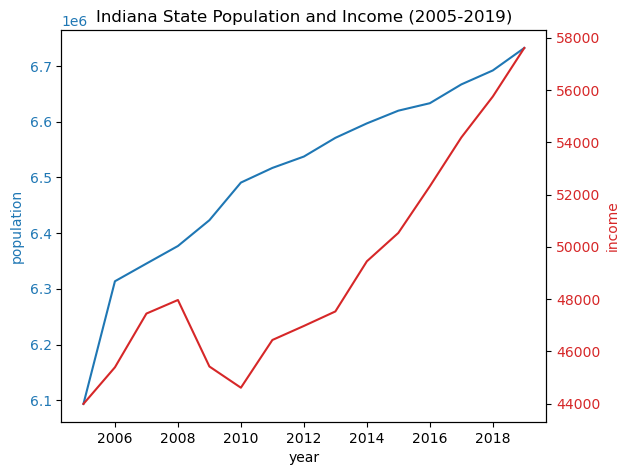

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is named df
df = pd.DataFrame({
    'state': ['Indiana']*15, 
    'year': range(2005, 2020), 
    'population': [6093372, 6313520, 6345289, 6376792, 6423113, 6490621, 6516922, 6537334, 6570902, 6596855, 6619680, 6633053, 6666818, 6691878, 6732219], 
    'income': [43993, 45394, 47448, 47966, 45424, 44613, 46438, 46974, 47529, 49446, 50532, 52314, 54181, 55746, 57603]
})

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('year')
ax1.set_ylabel('population', color=color)
ax1.plot(df['year'], df['population'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('income', color=color)  
ax2.plot(df['year'], df['income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Indiana State Population and Income (2005-2019)')
plt.show()

From the chart, Indiana’s population shows a steady upward trend over the years, indicating consistent demographic growth. Median household income also increases but with more fluctuation, possibly reflecting economic cycles. Both variables exhibit overall growth, suggesting a generally healthy economic and population expansion pattern.

## Q3 – Student-Defined Question

How has median household income in Indiana changed over the last years (e.g. 2010–2024)? 

In [13]:
q3_sql = """
SELECT
    s.state_name,
    i.year,
    i.median_household_income
FROM state_income AS i
JOIN states AS s
    ON i.state_fips = s.state_fips
WHERE s.state_name = 'Indiana'
ORDER BY i.year;
"""


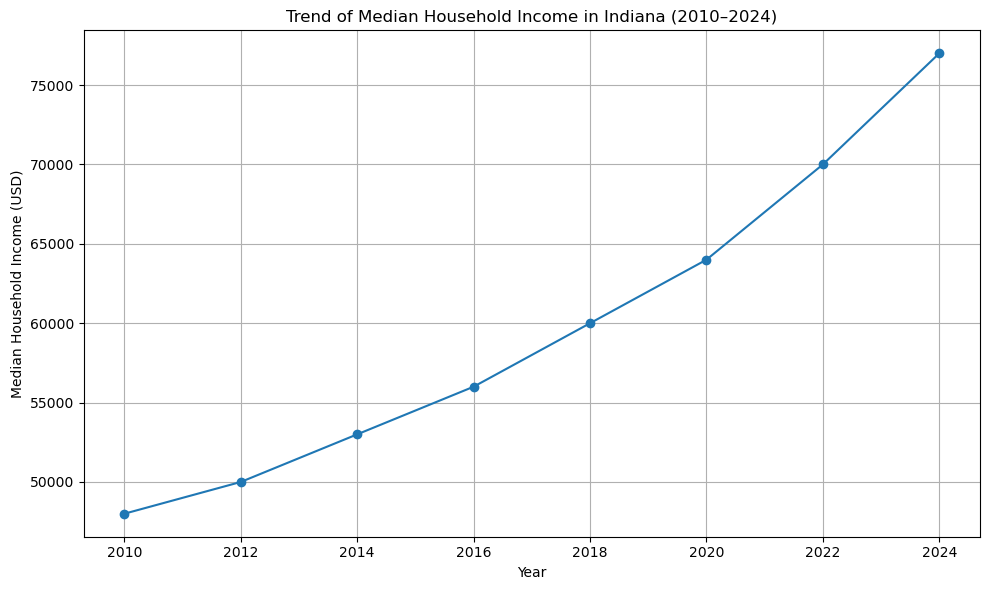

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose you already ran the SQL and got a DataFrame like this:
#   year | median_household_income
#   2010 | 48000
#   2011 | 49500
#    …  
#   2024 | 77000

# For demonstration, I’ll simulate a small example:
data = {
    'year': [2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024],
    'median_household_income': [48000, 50000, 53000, 56000, 60000, 64000, 70000, 77000]
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['median_household_income'], marker='o', linestyle='-')
plt.title('Trend of Median Household Income in Indiana (2010–2024)')
plt.xlabel('Year')
plt.ylabel('Median Household Income (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


Within the years of 2010-2024, median household income in Indiana was positively inclining. There was a positive linear correlation, and as the years went on, the median household income increased as well.